## Background / Motivation

Each of us is an avid foodie with a passion for exploring restaurants and discovering new businesses. When brainstorming ideas for this project, we decided to draw upon this commonality to focus on the Yelp app. After all, each of us uses Yelp on a regular basis to find our next food adventure. Furthermore, Yelp is among the Top 50 most visited websites in the US [1]; given its popularity nationwide, our analysis has broad applications. We hoped analyzing the Yelp dataset would enhance our and others' experiences as app users and as customers of Yelp businesses. 

## Problem statement 

**1) Are the categories of stores different across different locations?** 

This is an analysis of how the categories of businesses are different in Indianapolis and St. Louis. This analysis was done for 1) all businesses and 2) the top 100 businesses in each city. 

**2) What factors contribute to 5-star ratings on Yelp?**

To conduct the analysis, the popularity of businesses in St. Louis and Indianapolis with and without specific attributes (Take Out, Accepting Credit Cards, etc.) were compared to one another. Here, popularity was defined by star rating and number of reviews on Yelp.

**3) How do Indianapolis & St. Louis compare in terms of accessibility?**
This is an analysis of the percentage of businesses in the two cities that are wheelchair accessible and how accessibility changes based upon business star rating and price range.

**4) How has user interaction of Yelp features changed over time?**

An in depth analysis of two user features on Yelp: reviews and tips with a look into effects of time, seasonal impacts, and correlation between the two features.

## Data sources

We used the Yelp Open Dataset, which can be found at this link: https://www.yelp.com/dataset. The dataset consists of 5 sub-datasets, each available as JSON files, that pertain to businesses, reviews, tips, check-ins, and users. We used three of the five sub-datasets: business, reviews, and tips. The business dataset contains specific information about each business, such as its name, location, and attributes. The reviews dataset contains reviews left by users. The tips dataset contains tips left by users. It should be noted that tips here are not monetary tips, but rather shorter and less detailed versions of reviews that describe something specific to a business. 

## Stakeholders
We identified three primary stakeholders: users, who will learn what businesses are most available and accessible; businesses, who will gain an understanding of the attributes customers value most; and Yelp developers, who can use analysis results to determine what features Yelp users utilize most frequently. However, any individual/entity that uses or cares about Yelp to any extent could have stakes in the outcome of our analysis.

## Data quality check / cleaning / preparation

In [7]:
indiana_concat.describe()

,latitude,longitude,stars,review_count,is_open
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.0
mean,39.814831,-86.135166,4.035923,103.579783,1.0
std,0.077713,0.065552,0.798439,182.822336,0.0
min,39.583316,-86.326346,1.000000,5.000000,1.0
25%,39.767368,-86.159195,3.500000,12.000000,1.0
50%,39.795072,-86.142740,4.000000,34.000000,1.0
75%,39.884867,-86.100421,4.500000,123.000000,1.0
max,39.941176,-85.942607,5.000000,2233.000000,1.0


In [32]:
lst1 = []
for i in indiana_concat.columns:
    if i not in indiana_concat._get_numeric_data().columns:
        if indiana_concat[i].dtypes != 'dict':
            lst1.append(indiana_concat[i].value_counts().loc[lambda x : x>2])
# We printed just the first four columns and such values that appear more than twice for the sake of brevity
print(lst1[1:5])

[Jimmy John's          21
CVS Pharmacy          17
Buffalo Wild Wings     6
Meijer                 5
Kohl's                 5
Target                 5
Fresh Thyme Market     4
Cafe Patachou          3
Donatos Pizza          3
McNamara Florist       3
Red Lobster            3
Subway                 3
Name: name, dtype: int64, 8702 Keystone Crossing    7
222 E Market St           6
1220 Waterway Blvd        6
6020 E 82nd St            5
                          5
5135 S Emerson Ave        4
910 W 10th St             3
906 Carrollton Ave        3
2442 Central Ave          3
8487 Union Chapel Rd      3
Name: address, dtype: int64, Indianapolis    1195
Name: city, dtype: int64, IN    1197
Name: state, dtype: int64]


In [39]:
indiana_concat.isnull().sum()

business_id                      0
name                             0
address                          0
city                             0
state                            0
postal_code                      0
latitude                         0
longitude                        0
stars                            0
review_count                     0
is_open                          0
attributes                       0
categories                       0
hours                           23
RestaurantsReservations        708
RestaurantsTakeOut             513
RestaurantsAttire              824
GoodForKids                    658
BikeParking                    181
RestaurantsPriceRange2         317
BusinessAcceptsCreditCards      16
GoodForMeal                    799
RestaurantsGoodForGroups       768
OutdoorSeating                 636
WiFi                           407
Alcohol                        677
RestaurantsDelivery            519
BusinessParking                136
HasTV               

In [4]:
saint_louis_data.describe()

,postal_code,latitude,longitude,stars,review_count,is_open
count,3405.000000,3405.000000,3405.000000,3405.000000,3405.00000,3405.0
mean,63119.935389,38.613826,-90.311106,3.623789,55.63906,1.0
std,15.657240,0.058316,0.074321,0.987670,139.83105,0.0
min,63011.000000,38.410072,-90.536771,1.000000,5.00000,1.0
25%,63109.000000,38.587058,-90.359080,3.000000,8.00000,1.0
50%,63119.000000,38.616109,-90.305117,4.000000,15.00000,1.0
75%,63130.000000,38.643327,-90.255672,4.500000,42.00000,1.0
max,63190.000000,38.820706,-89.966448,5.000000,3999.00000,1.0


In [33]:
lst2 = []
for i in saint_louis_concat.columns:
    if i not in saint_louis_concat._get_numeric_data().columns:
        if saint_louis_concat[i].dtypes != 'dict':
            lst2.append(saint_louis_concat[i].value_counts().loc[lambda x : x>2])
# We printed just the first four columns and such values that appear more than twice for the sake of brevity
print(lst2[1:5])

[Imo's Pizza     4
7-Eleven        4
CVS Pharmacy    3
Name: name, dtype: int64,                      6
2017 Chouteau Ave    3
315 Chestnut St      3
Name: address, dtype: int64, Saint Louis    625
Name: city, dtype: int64, MO    627
Name: state, dtype: int64]


In [40]:
saint_louis_concat.isnull().sum()

business_id                     0
name                            0
address                         0
city                            0
state                           0
postal_code                     0
latitude                        0
longitude                       0
stars                           0
review_count                    0
is_open                         0
attributes                      0
categories                      0
hours                          10
RestaurantsPriceRange2         94
BusinessParking                44
RestaurantsGoodForGroups      356
HasTV                         341
Caters                        327
Ambience                      354
OutdoorSeating                329
BusinessAcceptsCreditCards      4
RestaurantsAttire             389
RestaurantsReservations       350
RestaurantsTakeOut            286
Alcohol                       336
WheelchairAccessible            0
NoiseLevel                    360
WiFi                          233
RestaurantsTab

In [5]:
# Reviews - Indianapolis
reviews100in.describe()

,stars,useful,funny,cool
count,65658.000000,65658.000000,65658.000000,65658.000000
mean,4.123793,0.903667,0.186421,0.498294
std,1.154761,1.817192,0.870931,1.280213
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,1.000000
max,5.000000,101.000000,72.000000,96.000000


In [6]:
reviews100in.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [7]:
# Reviews - Saint Louis
reviews100sl.describe()

,stars,useful,funny,cool
count,68568.000000,68568.000000,68568.000000,68568.000000
mean,4.117927,0.921027,0.308322,0.525872
std,1.163043,2.309245,1.228385,1.655394
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,52.000000,63.000000,45.000000


In [8]:
reviews100sl.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [10]:
# Tips - Indianapolis
tips100in.describe()

,Unnamed: 0,compliment_count
count,9828.000000,9828.000000
mean,415368.164326,0.008751
std,265311.997484,0.101504
min,55.000000,0.000000
25%,181090.000000,0.000000
50%,385637.500000,0.000000
75%,640026.250000,0.000000
max,908846.000000,2.000000


In [11]:
tips100in.isnull().sum()

Unnamed: 0          0
user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [12]:
#Tips - Saint Louis
tips100sl.describe()

,Unnamed: 0,compliment_count
count,11198.000000,11198.000000
mean,453651.674763,0.008216
std,264133.776097,0.093192
min,92.000000,0.000000
25%,221713.750000,0.000000
50%,454605.000000,0.000000
75%,680581.250000,0.000000
max,908903.000000,2.000000


In [13]:
tips100sl.isnull().sum()

Unnamed: 0          0
user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

We filtered our data to include only St. Louis and Indianapolis data in order to obtain results most applicable to the Midwest, the region we currently reside in. Moreover, restricting our data to these cities makes reduces the sizse of the dataset, as the original one is too large to analyze and draw conclusions from.

Below is the code for our initial data preparation. We read the business dataset and then filtered it by city to create a separate CSV file and JSON file per city of all the businesses in that city. This was modeled after Github repository by Juliette Wong [2]. We read our business dataset as she did and simplified her city filtering code for our specific cities. Less formatting correction was needed for our two cities so our code was much shorter.

Overall, we ran into some issues with the nature of our data itself. The dataset did not include that much information about large American cities (New York, Chicago, etc...), which did not logically make sense based on the high populations of the cities. This, along with other forms of bias (e.g. users leaving more positive than negative reviews) could have skewed the findings of our EDA. Furthermore, many of the variables we analyzed used information from Yelp reviews/pages that are self reported, so the validity is not completely assured.

The reviews and tips datasets had no missing variables and no missing values and so did not require any form of data cleaning prior to use.

Further on data cleaning, the analysis for question 1 required some data cleaning in order to conduct the analysis successfully. The categories column of the business dataset had to be cleaned into a different format in order to compare the buckets that each restaurant fell into. Each category array was split into a list of each different value in the array (using the `.split(' , ')` method). The remaining three analyses describe their data cleaning /preparation in their individual analysis section.

In [1]:
import pandas as pd
import numpy as np
import re, string
import json
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Filtering data to only include Indianapolis & Saint Louis

def init_ds(json):
    ds= {}
    keys = json.keys()
    for k in keys:
        ds[k]= []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file) as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count ==0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
                
        return pd.DataFrame(dataset)
    
# business dataset
businesses = read_json('yelp_academic_dataset_business.json')

#Indianapolis CSV

in_string = (businesses.city.str.strip().str.lower() == 'indianapolis')
indiana_string = businesses.state == 'IN'
indianapolis = businesses[(in_string) & (indiana_string)]

indianapolis.head()

indianapolis.to_csv('indianapolis_data.csv')

# Saint Louis CSV

sl_string = (businesses.city.str.strip().str.lower() == 'saint louis')
mo_string = businesses.state == 'MO'
saint_louis = businesses[(sl_string) & (mo_string)]

saint_louis.head()

saint_louis.to_csv('saint_louis_data.csv')

# Indianapolis JSON

with open('indianapolis_sample.json', 'w') as f:
    indianapolis.to_json(f, orient='records', lines=True)
    
# Saint Louis JSON
    
with open('saint_louis_sample.json', 'w') as f:
    saint_louis.to_json(f, orient='records', lines=True)

## Exploratory Data Analysis

### Analysis 1
*By Avanti Parkhe*

Analysis 1: Are the categories of stores different across different locations? 

For this question I focused on the business dataset and specifically within that, the categories column. The goal of this question was to determine whether these two Midwestern college towns had a similar distribution of categories for businesses and whether the data and conclusions could be applied to make conclusions about Evanston (a Midwestern college town). I chose to analyze the categories across all businesses and the top 100 businesses (defined as the 100 businesses with the highest star ratings).

I did not anticipate running into many problems with this because it seemed like my question and the data analysis associated with it was quite straightforward. A part of the reason I assumed this question would be so straightforward was because I assumed that the data would be organized in a certain manner. I presumed that the categories column would be an array or list with each word / phrase separated by a comma, making it easy to parse through the data. However, when actually going through the data, I found it was more complicated than that. In order to make the data viable for analysis, I had to split each value in the array. Each category array was split into a list of each different value in the array (using the `.split(' , ')` method). Additionally, each entity was sometimes very long and repeated itself. For example, one of the categories found was "Pizza, Restaurant" and another was "Restaurant, Pizza." These two should have been the same, yet they showed up as different categories. In order to fix this, I had to manually merge two categories together. This is seen in the code block below. This block of code is for Indianapolis, but I did the same thing for St. Louis (which is shown below as well). 

After cleaning up the data in this way, I made the figures to illustrate the most popular business categories in both cities. I chose to use a pie chart because it showed the split of categories in a visual way across both cities. I created a helper function called get_color_gradient using this Kaggle code [4]. This made the pie chart more visually appealing. 

In [1]:
# helper function for color gradient

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

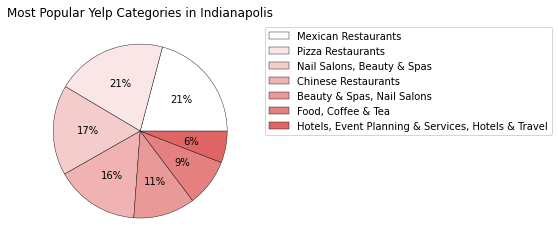

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

ind = pd.read_csv('indianapolis_data.csv')
stl = pd.read_csv('saint_louis_data.csv')

# top 100 businesses in both cities
top_100_ind = ind.sort_values(by = 'review_count', ascending = False)[:100]
top_100_stl = stl.sort_values(by = 'review_count', ascending = False)[:100]
ind_cat = {}

for each_arr in ind.categories.values:
    lst = each_arr.split(' , ')
    for x in lst:
        # a list comprised of each character
        # has each category and adds one to the dictionary if it already exists and makes it 1 if it doesn't 
        if x in ind_cat and ind_cat[x] >= 1:
            ind_cat[x] = ind_cat[x] + 1
        else:
            ind_cat[x] = 1

# Finding the most common category
categories = dict(Counter(ind_cat).most_common(10))
df = pd.DataFrame({'type': list(categories.keys()), 'num': list(categories.values())})

# Taking care of the duplicates that are labeled differently
df.loc[len(df.index)] = ['Mexican Restaurants', 71]
df.loc[len(df.index)] = ['Pizza Restaurants', 70]
df.loc[len(df.index)] = ['Chinese Restaurants', 53]
df = df.drop(index = [1,3,4,5,7,8])
df = df.sort_values(by = 'num', ascending = False)

# Creating the pie plot
color1 = '#FFFFFF'
color2 = '#e06666'
plt.figure(figsize = (4,4))
plt.pie(data = df, x = 'num', labels = None, autopct='%.0f%%', colors = get_color_gradient(color1, color2, 7),
       wedgeprops = {'edgecolor': 'black', 'linewidth': 0.4, 'antialiased': True})
plt.legend(labels = df['type'], bbox_to_anchor=(1.05, 1))
plt.title('Most Popular Yelp Categories in Indianapolis')
plt.show()

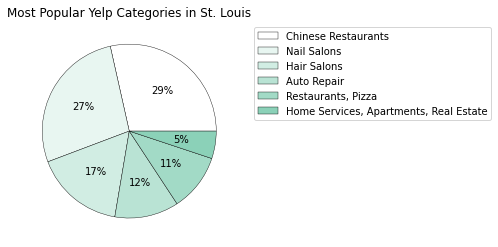

In [13]:
stl_cat = {}

for each_arr in stl.categories.values:
    lst = each_arr.split(' , ')
    for x in lst:
        # a list comprised of each character
        # has each category and adds one to the dictionary if it alr exists and makes it 1 if it doesn't 
        if x in stl_cat and stl_cat[x] >= 1:
            stl_cat[x] = stl_cat[x] + 1
        else:
            stl_cat[x] = 1

# Finding the most common category
categories = dict(Counter(stl_cat).most_common(10))
df = pd.DataFrame({'type': list(categories.keys()), 'num': list(categories.values())})

# Dealing with duplicates
df.loc[len(df.index)] = ['Chinese Restaurants', 67]
df.loc[len(df.index)] = ['Nail Salons', 64]
df.loc[len(df.index)] = ['Hair Salons', 39]
df.loc[len(df.index)] = ['Auto Repair', 28]
df = df.drop(index = [0,1,2,3,5,6,7,8])
df = df.sort_values(by = 'num', ascending = False)

# creating the pie plot
color1 = '#FFFFFF'
color2 = '#8BD1B8'
plt.figure(figsize = (4,4))
plt.pie(data = df, x = 'num', labels = None, autopct='%.0f%%', colors = get_color_gradient(color1, color2, 6),
       wedgeprops = {'edgecolor': 'black', 'linewidth': 0.4, 'antialiased': True})
plt.legend(labels = df['type'], bbox_to_anchor=(1.05, 1))
plt.title('Most Popular Yelp Categories in St. Louis')
plt.show()

I then chose to run this analysis again for the top 100 businesses in both cities. I had to do the same process when dealing with all businesses (splitting the categories array using the `.split(' , ')` method and apply it to the top 100 businesses. I then created the visualizations for the top 100 businesses in both cities. For this one, I chose to use a horizontal barplot since I had used a pie chart previously.

Text(0.5, 1.0, 'Most Popular Yelp Categories for Top 100 Businesses in Indianapolis')

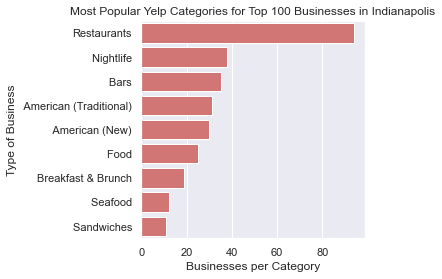

In [20]:
categories_ind_100 = {}
for array in top_100_ind.categories.values:
    cat_array = array.split(',')
    for x in cat_array:
        if x in categories_ind_100 and categories_ind_100[x] >= 1:
            categories_ind_100[x] = categories_ind_100[x] + 1
        else:
            categories_ind_100[x] = 1
            
categories = dict(Counter(categories_ind_100).most_common(10))
df = pd.DataFrame({'type': list(categories.keys()), 'count': list(categories.values())})

# Dealing with duplicates
df.loc[len(df.index)] = ['Restaurants', 94]
df = df.drop(index = [0,7])
df = df.sort_values(by = 'count', ascending = False)

# Creating the barplot
ax = sns.barplot(data = df, y = 'type', x = 'count', color = '#e06666')
sns.set(rc={'figure.figsize':(4,4)})
plt.xlabel('Businesses per Category')
plt.ylabel('Type of Business')
plt.title('Most Popular Yelp Categories for Top 100 Businesses in Indianapolis')

Text(0.5, 1.0, 'Most Popular Yelp Categories in Top 100 Businesses in St. Louis')

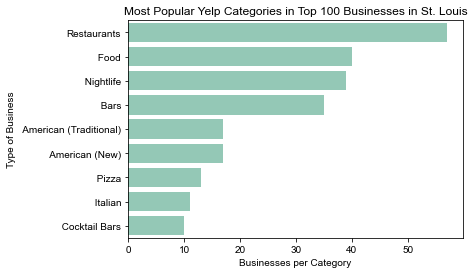

In [19]:
categories_stl_100 = {}
for array in top_100_stl.categories.values:
    cat_array = array.split(',')
    for x in cat_array:
        if x in categories_stl_100 and categories_stl_100[x] >= 1:
            categories_stl_100[x] = categories_stl_100[x] + 1
        else:
            categories_stl_100[x] = 1
            
categories = dict(Counter(categories_stl_100).most_common(10))
df = pd.DataFrame({'type': list(categories.keys()), 'num': list(categories.values())})

# dealing with duplicates
df.loc[len(df.index)] = ['Restaurants', 91]
df = df.drop(index = 0)
df = df.sort_values(by = 'num', ascending = False)

# making the plot
ax = sns.barplot(data = df, y = 'type', x = 'num', color = '#8BD1B8', ci = None)
sns.set(rc={'figure.figsize':(4,4)})
plt.xlabel('Businesses per Category')
plt.ylabel('Type of Business')
plt.title('Most Popular Yelp Categories in Top 100 Businesses in St. Louis')

This was the extent of the data analysis I chose to do. I was hoping to make conclusions about Evanston based on the categories of businesss in both these towns. Starting with all business categories, it seems like restaurants and nail salons are the some of the most popular categories across all businesses. If we assume that Evanston is like these towns, we could make the conclusion that restaurants and nail salons are some of the most popular businesses. To some degree, this makes sense because Evanston has a lot of restaurants; however, nail salons do not seem to be as prevalent in Evanston. Moving on to the top 100 businesses, restaurants, food, and nightlife seem to be some of the most popular categories. These results are probably more generalizable to Evanston because restaurants are quite popular here. That being said, restaurants probably comprise the most popular categories in most American cities, meaning these results are not quite as specific as hoped. 
When looking at this data, there is bias simply due to the nature of the data. There is not a lot of information about large American cities, which does not make sense because there should be a lot of available data about these cities. Additionally, the categories are quite unspecific (e.g. "Restaurants," "Food," etc...), making it difficult to make targeted conclusions about each city. For this reason, these figures have to be interpreted with context of knowing the nature of the data.  In conclusion, these results can be used to extrapolate information about Evanston, but they are not very specific, so it makes it difficult to specify these results. 

### Analysis 2
*By Ada Zhong*

Analysis 2: What factors contribute to 5-star ratings on Yelp?

On Yelp, users often identify businesses that are popular by looking at its star rating (out of five stars) and the number of reviews received. For my analysis, I was curious as to what business attributes were most associated with business popularity. Determining these attributes would be primarily useful for businesses, which could then identify and adapt to consumer priorities. 

To actually answer the question posed, I started by first concatenating the Indianapolis and St. Louis tables together to create a larger dataset of all businesses from both cities.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading the Indianapolis and St. Louis datasets
indianapolis = pd.read_csv('indianapolis_data.csv')
stl = pd.read_csv('saint_louis_data.csv')

# Creating the dataset of both cities for analysis
data = pd.concat([indianapolis, stl])
data.reset_index(inplace=True)

Before finding out which factors were most associated with business popularity, I wanted to see what the distribution of star ratings were already in each city. This would help inform my final results/recommendations and help visualize any skew in the data. As such, I created pie charts that used the function value_counts() to display the percentages of each star rating. I used the same helper functions for coloring the pie chart that Avanti utilized in Analysis 1, which we found on Kaggle [4].

In [2]:
# Helper functions to color the pie charts

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

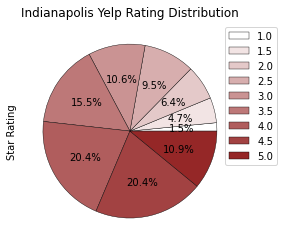

In [4]:
# Distribution of Yelp Ratings in Indianapolis Pie Chart

color1 = '#FFFFFF'
color2 = '#952727'
indpie=indianapolis.stars.value_counts().sort_index().plot(kind='pie', 
                                                           autopct='%1.1f%%', 
                                                           figsize=(4,4),
                                                           colors = get_color_gradient(color1, color2, 9),
                                                           wedgeprops = {"edgecolor" : "black",
                                                                        'linewidth': 0.4,
                                                                        'antialiased': True},
                                                           labels=None)
indpie.set_title("Indianapolis Yelp Rating Distribution")
indpie.set_ylabel("Star Rating")
indpie.legend(labels=[1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0],bbox_to_anchor=(1.2,1))

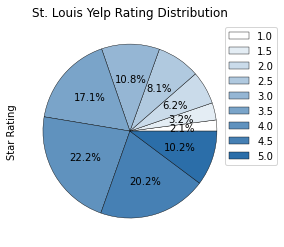

In [5]:
# Distribution of Yelp Ratings in St. Louis Pie Chart

color1 = '#FFFFFF'
color2 = '#2B6EA9'
stlpie = stl.stars.value_counts().sort_index().plot(kind='pie', 
                                                           autopct='%1.1f%%', 
                                                           figsize=(4,4),
                                                           colors = get_color_gradient(color1, color2, 9),
                                                           wedgeprops = {"edgecolor" : "black",
                                                                        'linewidth': 0.4,
                                                                        'antialiased': True},
                                                           labels=None)
stlpie.set_title("St. Louis Yelp Rating Distribution")
stlpie.set_ylabel("Star Rating")
stlpie.legend(labels=[1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0],bbox_to_anchor=(1.2,1))

From these charts, I was able to see that most ratings were already in the 4-5 star range. I hypothesized that this could be explained by selection bias and kept it in mind as a useful insight.

Next, I actually created the 20-some bar graphs that compared the association of each attribute with business popularity. I was inspired by a figure within a Yelp EDA conducted by Yashraj Wani, published on Kaggle [5]. In the EDA, Wani creates a line graph visualization of business popularity based on review count and stars for businesses with and without drive-thru and for businesses that are and are not designated as "good for dancing." As such, I decided to use star rating and review count as my x- and y-axis, respectively. However, I differed from Wani's analysis in my decision to use a bar graph to better represent the non-continuous nature of star ratings, as well as my application of this visualization to every attribute in the dataset--not just two. 

I thought my approach could be successful because just by looking at the attributes in the dataset, I figured some of them would be more associated with popularity. For example, intuitively, whether or not a business accepts Bitcoin likely wouldn't matter much to a business's popularity just because Bitcoin isn't a commonly used form of payment. On the other hand, an attribute such as being good for groups would seem to positively impact whether a consumer goes to that place and how much they enjoy their experience. 

I did anticipate some problems with my analysis. First, I knew I would be unable to establish causality. Second, I knew that extremely common business practices, such as accepting credit cards, would likely have an outsized impact on the data (i.e. I am unable to completely eliminate confoudning variables). Third, many attributes were listed as "None" instead of the binary "True"/"False," so a number of businesses just didn't have data available. In addition to these anticipated issues, I also encountered issues when I realized that I would have to explode the attributes, which were contained as a dictionary in a single column, into separate columns. I resolved this by reading the JSON files instead and using lines=True. Following the redone data, the first thing I tried did not work--I had initially attempted to create a FacetGrid of bar graphs. Realizing that I did not have the expertise to represent each separate figure within the FacetGrid as different attribute, I coded separate bar graphs instead.

In [7]:
# Reading the JSON data and re-creating the dataset

indianapolis_json = pd.read_json('indianapolis_sample.json', lines=True)
stl_json = pd.read_json('saint_louis_sample.json', lines=True)

data2 = pd.concat([indianapolis_json, stl_json])
data2.reset_index(inplace=True)

attr = pd.json_normalize(data2['attributes'])

# Creating a new df where attributes are seaprate cols

df = pd.concat([data2, attr], axis=1)

After creating my new dataset to analyze, I looked at all the attributes that were designated sufficient values of True/False/None. These ended up being RestaurantsReservations, RestaurantsTakeOut, GoodForKids, BikeParking, BusinessAcceptsCreditCards, RestaurantsGoodForGroups, OutdoorSeating, RestaurantsDelivery, HasTV, CoatCheck, Caters, HappyHour, GoodForDancing, RestaurantsTableService, DogsAllowed, ByAppointmentOnly, BusinessAcceptsBitcoin, DriveThru, AcceptsInsurance, BYOB, and Corkage.

I used this code below to look at and then choose the attributes (I am not printing the output from this code for space purposes).

   `for i in list(attr.columns):
    print(df[i].value_counts())`

I then created the bar plots, all of which are shown below.

Text(0, 0.5, 'Review Count')

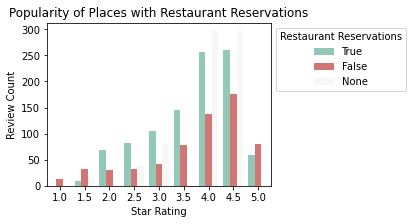

In [20]:
order_lst=['True', 'False', 'None']
plt.figure(figsize=(4,3))
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["RestaurantsReservations"], 
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Restaurant Reservations', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Restaurant Reservations')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')

Text(0, 0.5, 'Review Count')

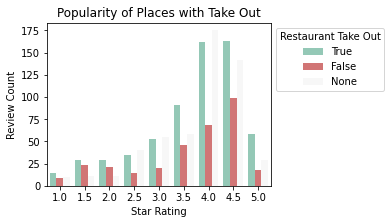

In [21]:
order_lst=['True', 'False', 'None']
plt.figure(figsize=(4,3))
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["RestaurantsTakeOut"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Restaurant Take Out', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Take Out')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')

As the code is essentially the same for every following graph, I have put the rest of the visualizations here with the actual code for them in the Appendix. 

_ |_ | _ | _
:-: | :-: | :-: | :-:
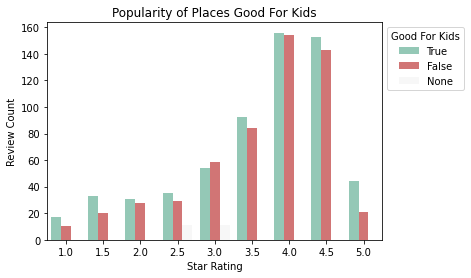 | 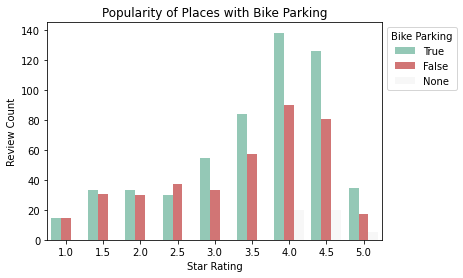 | 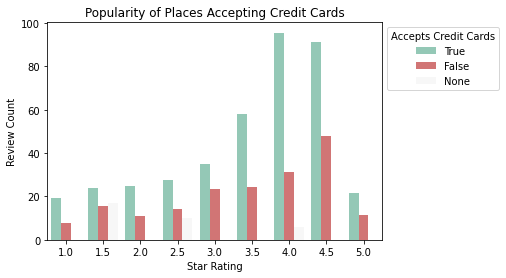 | 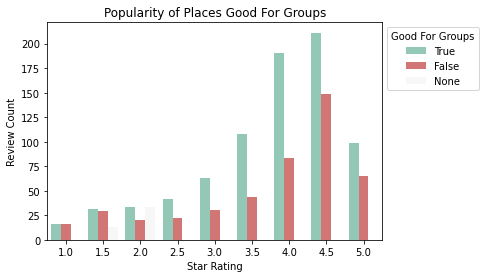
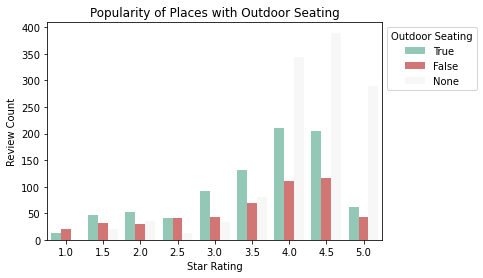 | 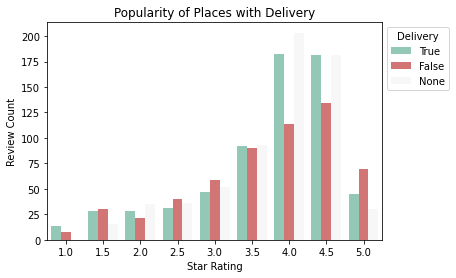 | 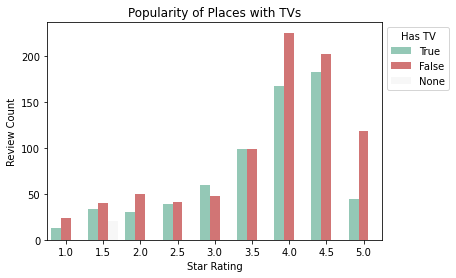 | 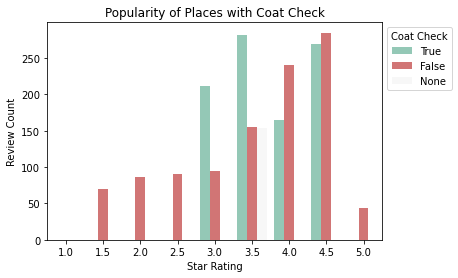
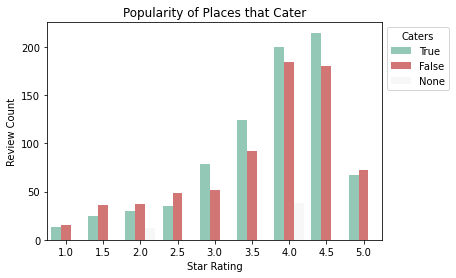 | 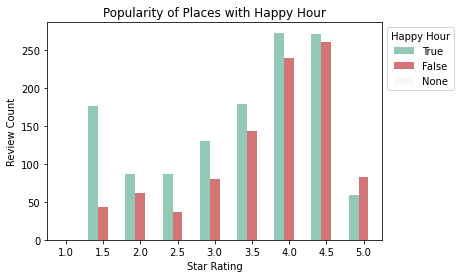 | 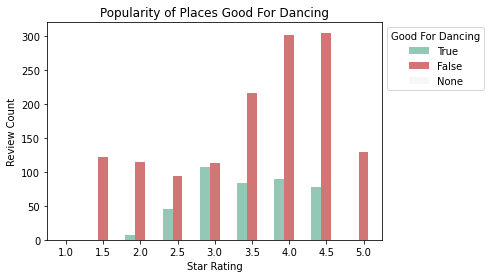 | 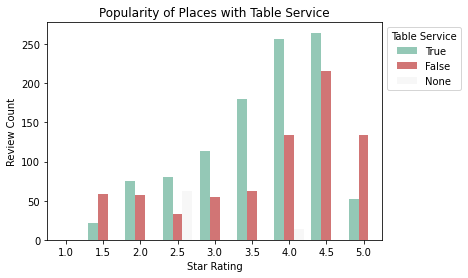
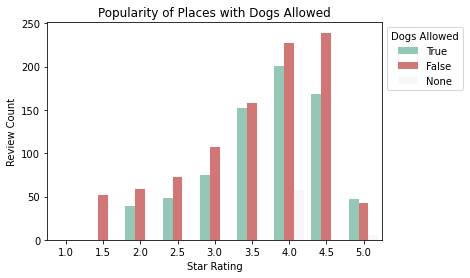 | 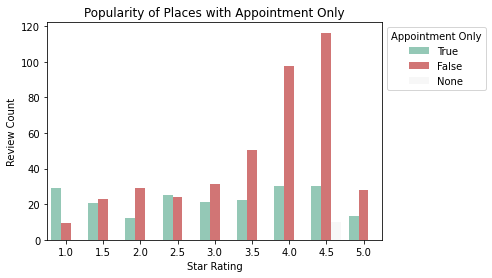 | 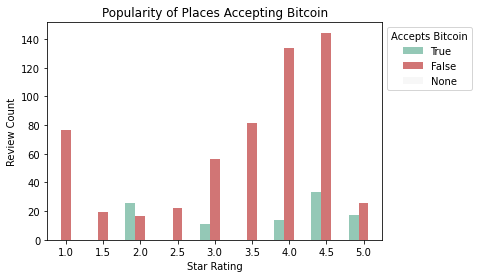 | 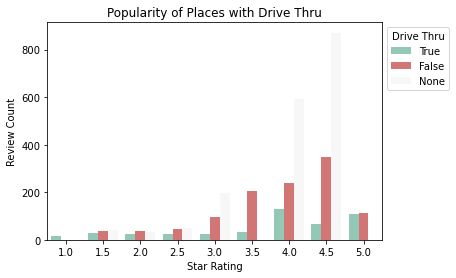 
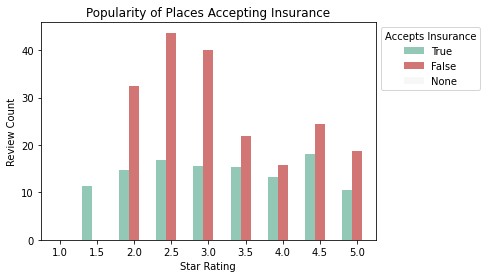 | 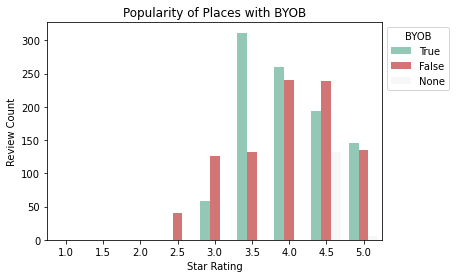| 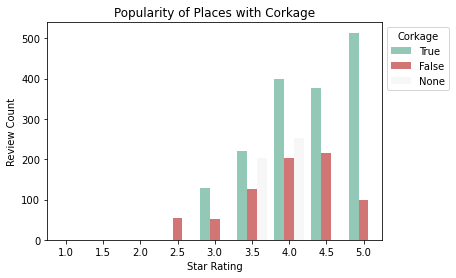

I thus determined that the factors more likely to be associated with business popularity were Restaurant Reservations, Take Out, Bike Parking, Accepts Credit Cards, Good For Groups, Outdoor Seating, Delivery, Table Service, and Corkage. The factors that I found unlikely to either enhance or impact business popularity were Good For Kids, Has TV, Coat Check, Caters, Happy Hour, Good For Dancing, Dogs Allowed, Appointment Only, Accepts Bitcoin, Drive Thru, Accepts Insurance, and BYOB. However, these findings may be skewed by the data actually available in the dataset as well as common/historical business practices.

### Analysis 3
*By Ava Serin*

Analysis 3: How do Indianapolis and St. Louis compare in terms of wheelchair accessibility?

I wanted to see how the accessibility of businesses in Indianapolis and St. Louis compare and if there were any connections with other aspects of the businesses. I thought this would be interesting and successful because The Americans with Disabilities Act (ADA) has been in effect since 1990, which is a significant time for newer restaurants to comply with these standards, but there still may be many restaurants which do not comply. I found that using barcharts and pie charts to display the information was the clearest solution and the one that derived the most interesting results.


I anticipated there to be issues with the validity of the data as some businesses did not report whether they were wheelchair accessible, and the Yelp dataset does not account for every single business in both respective cities. Furthermore, many businesses report being wheelchair accessible despite not every aspect of the establishment being actually accessible (bathrooms, for example).In terms of problems, Indianapolis reports its star ratings including half stars whereas St. Louis does not. At first, I had trouble grouping my data by wheelchair accessible and not, and there were many other aspects of the data I wanted to look at; however, many aspects such as dietary restrictions and existence of a DriveThru did not have enough businesses reporting for me to do sufficient analysis.

Upon beginning my analysis, I realized that to access the accessibility information I had to somehow "explode" a column of attributes in dictionary form into individual columns for each respective attribute. I was able to do this using the `pd.json_normalize()` function and concat the normalized column with the original dataset. I also excluded data from the wheelchair accessibility column that was marked as N/A.

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Reading original JSON Yelp files
indianapolis_data = pd.read_json('indianapolis_sample.json', lines = True)
saint_louis_data = pd.read_json('saint_louis_sample.json', lines = True)

# Normalizing the dictionary attributes column
attributes_i_db = pd.json_normalize(indianapolis_data['attributes'])
attributes_sl_db = pd.json_normalize(saint_louis_data['attributes'])

# Concating new columns to original dataframe
indiana_concat1 = pd.concat([indianapolis_data, attributes_i_db], axis = 1)
saint_louis_concat1 = pd.concat([saint_louis_data, attributes_sl_db], axis = 1)

# Eliminating N/A data
indiana_concat = indiana_concat1[indiana_concat1['WheelchairAccessible'].notna()]
saint_louis_concat = saint_louis_concat1[saint_louis_concat1['WheelchairAccessible'].notna()]

To begin, I visualized the percent of accessible businesses in the two cities using pie charts. Of the businesses reported, the vast majority are wheelchair accessible with Indianapolis being slightly more accessible than St. Louis. This was surprising as I did not expect many businesses to put in the time and money to renovate their facilities.

Text(0, 0.5, 'Accessible?')

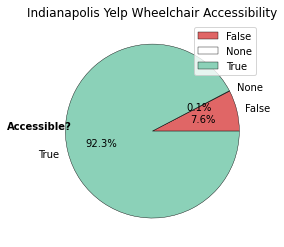

In [2]:
indpie = indiana_concat.WheelchairAccessible.value_counts().sort_index().plot(kind='pie', 
                                                           autopct='%1.1f%%', 
                                                           figsize=(4,4), 
                                                           colors = ['#e06666', '#FFFFFF', '#8BD1B8'],
                                                           wedgeprops = {"edgecolor" : "black",
                                                                        'linewidth': 0.4,
                                                                        'antialiased': True})
indpie.set_title("Indianapolis Yelp Wheelchair Accessibility")
# indpie.set_ylabel("Accessible?")
indpie.set_label('Label via method')
indpie.legend()
plt.ylabel("Accessible?", rotation='horizontal', fontweight='bold')

Text(0, 0.5, 'Accessible?')

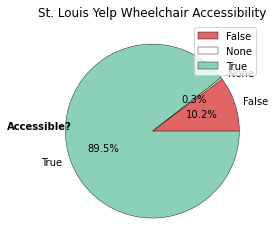

In [3]:
stlpie = saint_louis_concat.WheelchairAccessible.value_counts().sort_index().plot(kind='pie', 
                                                                                  autopct='%1.1f%%', 
                                                                                  figsize=(4,4), 
                                                                                  colors = ['#e06666', 
                                                                                            '#FFFFFF', 
                                                                                            '#8BD1B8'], 
                                                                                  wedgeprops = {"edgecolor" : "black", 
                                                                                                'linewidth': 0.4,
                                                                                                'antialiased': True})
stlpie.set_title("St. Louis Yelp Wheelchair Accessibility")
# stlpie.set_ylabel("Accessible?")
stlpie.set_label('Label via method')
stlpie.legend()
plt.ylabel("Accessible?", rotation='horizontal', fontweight='bold')

Then, for each city I visualized the number of accessible vs. non-accessible businesses for each price range Yelp has (measured by number of \\$s). I found that, \\$ corresponds to under \\$10, \\$\\$ to \\$11-\\$30 dollars, \\$\\$\\$ to \\$31-\\$60, and \\$\\$\\$\\$ to above \\$61. [6] I first grouped the data by acessibility status and then created barplots to visualize the results. It is easy to see that for both cities, businesses that are rated two dollar signs have the most accessible restaurants.

In [5]:
# Isolate price ranges of restaurants grouped by accessibility status
i_grouped_pr = pd.crosstab(indiana_concat.RestaurantsPriceRange2, indiana_concat['WheelchairAccessible'])
sl_grouped_pr = pd.crosstab(saint_louis_concat.RestaurantsPriceRange2, saint_louis_concat['WheelchairAccessible'])

Text(0.5, 1.0, 'Count of Businesses by Number of Dollar Signs (Indianapolis)')

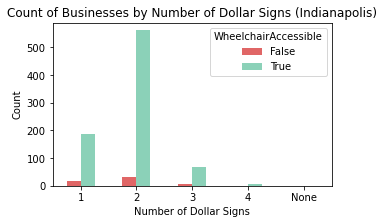

In [6]:
# Create and label barplot for Indianapolis
a = i_grouped_pr.plot.bar(ylabel = 'Count',
                          figsize=(5, 3), 
                          xlabel = 'Number of Dollar Signs', 
                          color = ['#e06666', '#8BD1B8'])
plt.xticks(rotation=0, horizontalalignment="center")
a.set_title('Count of Businesses by Number of Dollar Signs (Indianapolis)')

Text(0.5, 1.0, 'Count of Businesses by Number of Dollar Signs (St. Louis)')

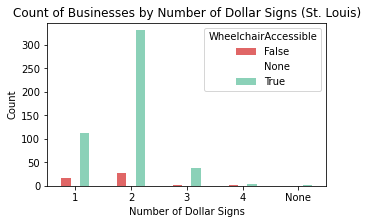

In [7]:
# Create and label barplot for St. Louis
b = sl_grouped_pr.plot.bar(ylabel = 'Count',
                           figsize=(5, 3), 
                           xlabel = 'Number of Dollar Signs', 
                           color = ['#e06666', '#FFFFFF', '#8BD1B8'])
plt.xticks(rotation=0, horizontalalignment="center")
b.set_title('Count of Businesses by Number of Dollar Signs (St. Louis)')

Finally, I looked at how businesses of varying accessibility statuses compared in terms of star ratings. As for the previous graphs, I first grouped the businesses by accessibility status and then made barplots showing the results. I found that Indianapolis' graph is left skewed and the rating with the most accessible businesses for the city is 4.5 stars compared to 2 stars for St. Louis. Therefore, according to Yelp's data, Indianapolis has more highly rated wheelchair accessible restaurants than St. Louis.

In [8]:
# Isolate star ratings of restaurants grouped by accessibility status
i_grouped_stars = pd.crosstab(indiana_concat.stars, indiana_concat['WheelchairAccessible'])
sl_grouped_stars = pd.crosstab(saint_louis_concat.stars, saint_louis_concat['WheelchairAccessible'])

Text(0.5, 1.0, 'Count of Businesses by Number of Star Ratings (Indianapolis)')

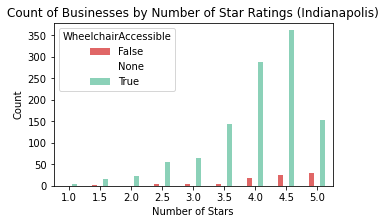

In [9]:
# Create and label barplot for Indianapolis
c = i_grouped_stars.plot.bar(ylabel = 'Count',
                             figsize=(5, 3), 
                             xlabel = 'Number of Stars', 
                             color = ['#e06666', '#FFFFFF', '#8BD1B8'])
plt.xticks(rotation=0, horizontalalignment="center")
c.set_title('Count of Businesses by Number of Star Ratings (Indianapolis)')

Text(0.5, 1.0, 'Count of Businesses by Number of Star Ratings (Saint Louis)')

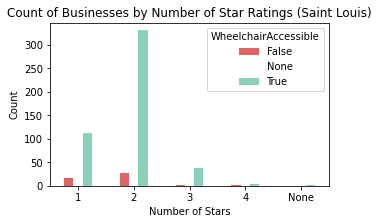

In [10]:
# Create and label barplot for St. Louis
d = sl_grouped_pr.plot.bar(ylabel = 'Count', 
                           figsize=(5,3), 
                           xlabel = 'Number of Stars', 
                           color = ['#e06666', '#FFFFFF', '#8BD1B8'])
plt.xticks(rotation=0, horizontalalignment="center")
d.set_title('Count of Businesses by Number of Star Ratings (Saint Louis)')

### Analysis 4
*By Emily Zhang*

Analysis 4: How has user interaction of Yelp features changed over time?

I tackled this question by focusing on two specific Yelp features, reviews and tips. Incorporating the check ins dataset would make the graphs too crowded and the analysis too overwhelming. I looked into impacts of time, season, and correlation. I knew this would be successful because intuitively, humans change over time and naturally so would their app interactions. The dataset also covers 17 years of data which is more than enough time for change to occur.

I did not anticipate any problems because I thought my question would be entirely straightforward. However, the problem I ran into occured before I even started my analysis. The reviews sub-dataset is the largest sub-dataset of the Yelp Open Dataset, sitting at 5.34 GB. It was entirely too big to even open. I had to do some data prep before it was ready to use. I had to filter it further beyond the city level filter previously applied to work with it. I filtered by business popularity on business id, taking only the top 100 business ids and filtering the tips and reviews dataset to include only these ids. Modeled after [3]. I changed up the cities and also chose to write the data to 4 separate  files: 2 tips csv files (1 per city) and 2 reviews json files (1 per city).

In [2]:
# Finding top 100 businesses

top100in = indianapolis.sort_values(by = 'review_count', ascending = False)[:100]
top100sl = saint_louis.sort_values(by = 'review_count', ascending = False)[:100]
in_100_ids = pd.Series(top100in['business_id'].index.values, index=top100in['business_id']).to_dict()
sl_100_ids = pd.Series(top100sl['business_id'].index.values, index=top100sl['business_id']).to_dict()

# TIPS

# yelp tips dataset
tips = pd.read_json('yelp_academic_dataset_tip.json', lines = True)

# filtering with the top 100 business ids 
tips_100_in = tips.loc[tips['business_id'].isin(in_100_ids), :]
tips_100_in.to_csv('tips100indiana.csv')
tips_100_sl = tips.loc[tips['business_id'].isin(sl_100_ids), :]
tips_100_sl.to_csv('tips100saintlouis.csv')

# REVIEWS

# filtering for top 100 businesses indianapolis
review_data = []
with open('yelp_academic_dataset_review.json') as f:
    for line in f:
        newline = ast.literal_eval(line)  # read the line (str) as a dict
        if newline['business_id'] in in_100_ids:
            review_data.append(json.loads(line))
review_df = pd.DataFrame.from_dict(review_data)

# writing to json file - indianapolis
with open('in_reviews_sample.json', 'w') as f:
    review_df.to_json(f, orient='records', lines=True)
    
# filtering for top 100 businesses saint louis
    
review_data = []
with open('yelp_academic_dataset_review.json') as f:
    for line in f:
        newline = ast.literal_eval(line)  # read the line (str) as a dict
        if newline['business_id'] in sl_100_ids:
            review_data.append(json.loads(line))
review_df = pd.DataFrame.from_dict(review_data)

# writing to json file - saint louis

with open('reviews100saintlouis.json', 'w') as f:
    review_df.to_json(f, orient='records', lines=True)

In [2]:
# writing to 2 new csv files - FINISHED PRODUCT
tips100in = pd.read_csv('tips100indiana.csv')
tips100sl = pd.read_csv('tips100saintlouis.csv')

#writing reviews to 2 new json files - FINISHED PRODUCT
reviews100in = pd.read_json('reviews100indiana.json', lines = True)
reviews100sl = pd.read_json('reviews100saintlouis.json', lines = True)

   Once I had successfully manipulated the code, I began my analysis. I used [3] as a springboard of ideas for graph designs. However, the code I wrote is unique and is my own work. Only graph ideas have ties to [3]. First, I created a lineplot for Average Star Ratings by Year and City to show the effect of time on users and the star ratings they leave. There is an overall positive trend in the graph for both cities indicating that users tend to leave higher star ratings over time. Users seem to become more positive the longer they remain on the Yelp app. Further analysis shows there is also an economic impact on users. The state of the economy tends to affect the level of ratings users leave. From 2007-2009, the star ratings are among the lowest of the graph, corresponding with the Great Recession and the economic fallout caused by it. The rise of ratings since then corresponds with the recovery of the economy. The sudden drop of ratings in 2020 corresponds with the economic downturn due to the pandemic. Users either consciously or subconsciously are influenced by the economy, which makes sense because businesses tend to prosper when the economy does. A prospering business will have better ratings.

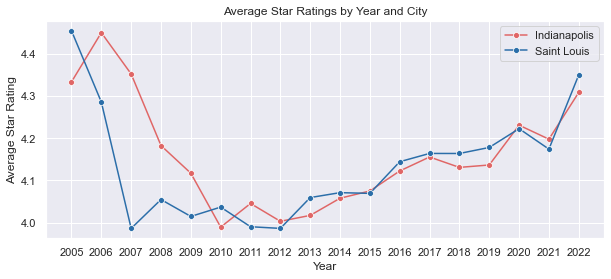

In [9]:
# Avg Star Ratings by Year and City

# SNS CALCULATES AVG AUTOMATICALLY

sns.set(rc={'figure.figsize':(10,4)})

reviews100in['date'] = pd.to_datetime(reviews100in['date'])
reviews100in['year'] = reviews100in.date.dt.year
reviews100sl['date'] = pd.to_datetime(reviews100sl['date'])
reviews100sl['year'] = reviews100sl.date.dt.year

years_reviews_plot = sns.lineplot(data = reviews100in, x = 'year', y = 'stars', color = '#e06666', marker = 'o', ci = None, label = 'Indianapolis')
years_reviews_plot = sns.lineplot(data = reviews100sl, x = 'year', y = 'stars', color = '#2B6EA9', marker = 'o', ci= None, label = 'Saint Louis')

plt.xlabel('Year')
plt.xticks([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.ylabel('Average Star Rating')
plt.title('Average Star Ratings by Year and City')
plt.legend()
plt.show()

Next, I looked at count of tips. Interestingly enough, there is a seasonal impact on the number of tips users leave. Users leave the most tips in the warmest months, with a peak in July for both cities. This correlates with the warmer months being peak travel season. The more individuals travel, the more business they tend to visit and thus the more tips they leave overall. Contrastly, users leave the least tips during the colder months, with a peak in November for both cities. This correlates with the holiday season. During these winter months, people stay home with their families and are less likely to leave and engage with outside businesses. 

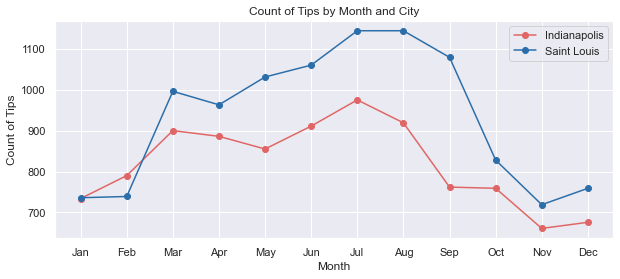

In [10]:
# Count of Tips by Month and City

sns.set(rc={'figure.figsize':(10,4)})

tips100in['date'] = pd.to_datetime(tips100in['date']) 
tips100in['year'] = tips100in.date.dt.year
tips100sl['date'] = pd.to_datetime(tips100sl['date']) 
tips100sl['year'] = tips100sl.date.dt.year

tips100in['month'] = tips100in.date.dt.month
tips100sl['month'] = tips100sl.date.dt.month

ax = tips100in.groupby('month').size().plot(ylabel = 'Count of Tips', color = '#e06666', label = 'Indianapolis', marker = 'o')
ax = tips100sl.groupby('month').size().plot(ylabel = 'Count of Tips', color = '#2B6EA9', label = 'Saint Louis', marker = 'o')
ax.set_title('Count of Tips by Month and City')

plt.xlabel('Month')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()

From there, I dove dove deeper into analyzing both of these features together. There is a positive correlation between tips and reviews for both cities, indicating that users tend to use both simultaneously. Upon closer inspection of the change over time of reviews and tips plotted together, grouped by city, I observed three things of interest. Let's group the graph into three periods: period 1 = 2005-2012, period 2 = 2012-2018, and period 3 = 2018-present. In period 1, there is enormous increases in both reviews and tips because of overall user growth on the app. Yelp experienced significant growth in between 2007 and 2008. In period 2, you can see the beginnings of preference adoption. Users begin to prefer reviews over tips. Finally, in period 3, there is a downward trend (very steep for reviews, less so for tips) continuing into present day. There is overall less user interaction which is the key thing to highlight.

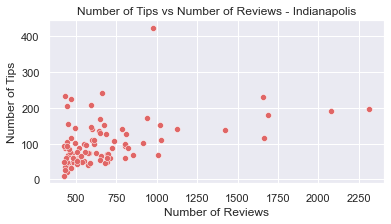

In [5]:
# Number of Tips vs Number of Reviews - Indianapolis

sns.set(rc={'figure.figsize':(6,3)})
tips_all_in = tips100in.groupby('business_id').size()
reviews_all_in = reviews100in.groupby('business_id').size()
sns.scatterplot(x = reviews_all_in, y = tips_all_in, color = '#e06666')

plt.xlabel('Number of Reviews')
plt.ylabel('Number of Tips')
plt.title('Number of Tips vs Number of Reviews - Indianapolis')
plt.show()

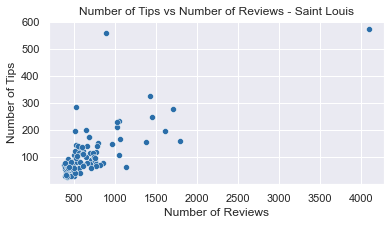

In [6]:
# Number of Tips vs Number of Reviews - Saint Louis

sns.set(rc={'figure.figsize':(6,3)})
tips_all_sl = tips100sl.groupby('business_id').size()
reviews_all_sl = reviews100sl.groupby('business_id').size()
sns.scatterplot(x = reviews_all_sl, y = tips_all_sl, color = '#2B6EA9')

plt.xlabel('Number of Reviews')
plt.ylabel('Number of Tips')
plt.title('Number of Tips vs Number of Reviews - Saint Louis')
plt.show()

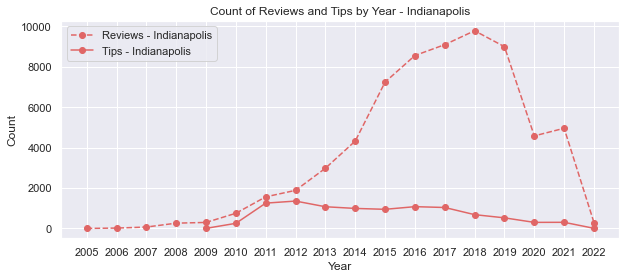

In [11]:
# Count of Reviews and Tips by Year - Indianapolis

sns.set(rc={'figure.figsize':(10,4)})
tips_count_in = tips100in.groupby('year').size() 
reviews_count_in = reviews100in.groupby('year').size()

plt.plot(reviews_count_in, label = 'Reviews - Indianapolis', marker = 'o', color = '#e06666', linestyle = 'dashed')
plt.plot(tips_count_in, label = 'Tips - Indianapolis', marker = 'o', color = '#e06666')

plt.xlabel('Year')
plt.xticks([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.ylabel('Count')
plt.title('Count of Reviews and Tips by Year - Indianapolis')
plt.legend()
plt.show()

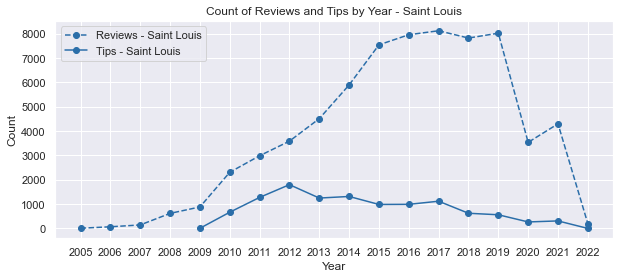

In [12]:
# Count of Reviews and Tips by Year - Saint Louis

sns.set(rc={'figure.figsize':(10,4)})

tips_count_sl = tips100sl.groupby('year').size()
reviews_count_sl = reviews100sl.groupby('year').size()

plt.plot(reviews_count_sl, label = 'Reviews - Saint Louis', marker = 'o', color = '#2B6EA9', linestyle = 'dashed')
plt.plot(tips_count_sl, label = 'Tips - Saint Louis', marker = 'o', color = '#2B6EA9')

plt.xlabel('Year')
plt.xticks([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.ylabel('Count')
plt.title('Count of Reviews and Tips by Year - Saint Louis')
plt.legend()
plt.show()

## Conclusions

Each group member's respective questions come together to show how businesses in St. Louis and Indianapolis compare through the lens of Yelp reviews. Much of the analysis can begin to answer the question of how can businesses make decisions and changes to influence their popularity and what can customers in each city expect to find in terms of aspects of businesses. 

Broadly speaking, we can boil down each analysis' findings into a brief concolusion relating to this overall question. Analysis 1 might suggest that some industries including Mexican and Chinese restaurants, coffee shops, and salons are already relatively saturated in the two midwestern cities. Additionally, analysis 2 revealed that business popularity was most likely correlated with availability of restaurant reservations, take out, bike parking, accepts credit cards, good for groups, outdoor seating, delivery, table service, and corkage. Moreover, analysis 3 revealed that Indianapolis has more highly rated wheelchair accessible restaurants than St. Louis and that, for both cities, businesses that are rated two dollar signs have the most wheelchair accessible restaurants. Finally, analysis 4 marked a bit of a departure from customer perspective and looked more at Yelp data as a whole. It found that there is a seasonal impact on the number of tips users leave and that there is a positive correlation between tips and reviews for both cities. These takeaways can all unite to allow restaurants, Yelp employees, and customers to make better informed decisions about how to run businesses and how to interpret reviews and the offerings in St. Louis and Indianapolis.

## Recommendations to stakeholder(s)

We identified three main stakeholders for our EDA: users, businesses, and Yelp developers. Based on our analysis, we recommend that users use Yelp primarily for restuarants/hair salons because they are more prevalent on the app. For lesser popular categories like hotels/real estate, other platforms are likely to be more more useful (e.g. Tripadvisor). We also recommend using Yelp to determine whether a restuarant is wheelchair accessible, since this information is accurate and on the app. As for businesses, we encourage them to focus on improving/prioritizing attributes that likely contribute to their 5-star ratings, such as having take-out services, restaurant reservations, and accepting credit cards. We also recommend that businesses comply to ADA standards to be on par with other businesses. Yelp developers should brainstorm new means of user engagement aside from leaving tips and reviews to combat the negative trend in user interaction and devise strategies to increase engagement in colder months. 

Users and businesses should be aware that most ratings in the dataset were in the 4-5 star rating range, and it is unclear whether this is due to what data was available in the dataset or if this is actually representative of all Yelp ratings. While this does not necessarily impact the aforementioned recommendations for users, businesses should be cognizant that the factors associated with business popularity (as identified in Analysis 2) may not be 100% accurate as a result.

Additionally, as we reduced our scope to Indianapolis and St. Louis, these results are most applicable to those cities/the Midwest. Stakeholders in other geographical regions should redo the analysis with a different subset of the dataset; in cases of stakeholders located in regions where there is no data for it in the larger dataset (e.g. New York City, Chicago), they may need to do independent data collection.

Lastly, in Analysis 2 and 3, many of the businesses did not have data for specific attributes (i.e. they were marked "None" instead of "True"/"False") including Wheelchair Accessibility. As such, for fully accurate data, stakeholders may want Yelp to recollect data for those businesses.

Despite limitations, stakeholders can still draw useful insights to make decisions. The data may be limited in some senses, but many significant trends and insights were still obtained.

## References {-}

[1] Marinova, Iva (2022). "25+ Groundbreaking Yelp Statistics to Make 2022 Count." Review 42, https://review42.com/resources/yelp-statistics/

[2] Wong, Juliette (2021). "Creating Yelp Samples - Pittsburgh, Las Vegas." Github repository, https://github.com/jujuwong21/Yelp-EDA/blob/master/Creating%20Yelp%20Samples%20-%20Pittsburgh%2C%20Las%20Vegas.ipynb

[3] Wong, Juliette (2021). "Yelp Visualizations." Github repository, https://github.com/jujuwong21/Yelp-EDA/blob/master/Yelp%20Visualizations.ipynb

[4] Artley, Brendan. “Matplotlib Color Gradients.” Kaggle, https://www.kaggle.com/code/brendanartley/matplotlib-color-gradients/notebook. 

[5] Wani, Yashraj. "Yelp Exploratory Data Analysis." Kaggle, https://www.kaggle.com/code/yashrajwani/yelp-exploratory-data-analysis/notebook

[6] Yu, Chao (2021). "The disproportion of crowd wisdom: The impact of status seeking on Yelp reviews." PLOS ONE,
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0252157#sec007

## Appendix

<details>
  <summary>Code for the rest of the bar graphs in Analysis 2, in order of appearance (CLICK TO OPEN)</summary>


<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["GoodForKids"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Good For Kids', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places Good For Kids')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["BikeParking"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Bike Parking', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Bike Parking')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["BusinessAcceptsCreditCards"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Accepts Credit Cards', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places Accepting Credit Cards')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["RestaurantsGoodForGroups"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Good For Groups', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places Good For Groups')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["OutdoorSeating"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Outdoor Seating', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Outdoor Seating')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["RestaurantsDelivery"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Delivery', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Delivery')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["HasTV"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Has TV', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with TVs')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["CoatCheck"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Coat Check', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Coat Check')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
      
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["Caters"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Caters', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places that Cater')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["HappyHour"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Happy Hour', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Happy Hour')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
       
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["GoodForDancing"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Good For Dancing', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places Good For Dancing')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
 
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["RestaurantsTableService"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Table Service', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Table Service')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["DogsAllowed"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Dogs Allowed', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Dogs Allowed')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["ByAppointmentOnly"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Appointment Only', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Appointment Only')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["BusinessAcceptsBitcoin"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Accepts Bitcoin', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places Accepting Bitcoin')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["DriveThru"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Drive Thru', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Drive Thru')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["AcceptsInsurance"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Accepts Insurance', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places Accepting Insurance')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["BYOB"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='BYOB', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with BYOB')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code> 
    
<code>order_lst=['True', 'False', 'None']
bar_drivethru=sns.barplot(x=df["stars"],
                          y=df["review_count"],
                          hue=df["Corkage"],
                          palette=['#8BD1B8', '#e06666', '#F7F7F7'],
                          ci=None, hue_order=order_lst)
bar_drivethru.legend(title='Corkage', bbox_to_anchor=(1,1))
bar_drivethru.set_title('Popularity of Places with Corkage')
bar_drivethru.set_xlabel('Star Rating')
bar_drivethru.set_ylabel('Review Count')</code>     
</details>